In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
I = Image.open('download.jpeg')
I = np.asarray(I)
[m,n,c]= I.shape
print("Rows:"+str(m))
print("Columns:"+str(n))
print("Channels:"+str(c))

Rows:224
Columns:224
Channels:3


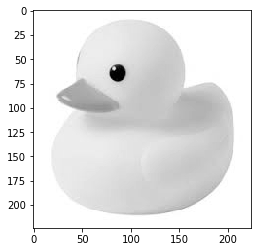

In [3]:
from skimage.color import rgb2gray
I = rgb2gray(I)
plt.imshow(I, cmap='gray')
plt.show()

In [4]:
scale = 4
scaled_m = scale*m
scaled_n = scale*n

In [5]:
I_new = np.zeros([scaled_m,scaled_n], dtype='float32')

In [6]:
# Genearate a new output image
for count1 in range(0,scaled_m,4):
    for count2 in range(0,scaled_n,4):
        for count3 in range(scale):
            for count4 in range(scale):
                I_new[count1+count3,count2+count4] = I[np.uint32(np.ceil(count1/scale)),np.uint32(np.ceil(count2/scale))]
                #print(count1,count2,count1+count3,count2+count4)

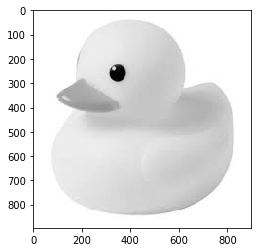

In [7]:
plt.imshow(I_new, cmap='gray')

In [8]:
# Nearest Interpolation
I_new = np.zeros([scaled_m,scaled_n], dtype='float32')

In [9]:
# Genearate a new output image
for count1 in range(0,scaled_m):
    for count2 in range(0,scaled_n):
        I_new[count1,count2] = I[np.uint32(np.floor(count1/scale)), np.uint32(np.floor(count2/scale))]
        #print(count1, count2, np.floor(count1/scale), np.floor(count2/scale))

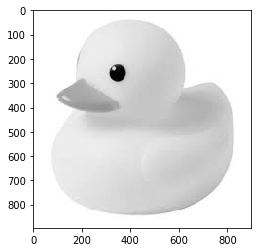

In [10]:
plt.imshow(I_new, cmap='gray')

In [11]:
# Bilinear Interpolation
I_new = np.zeros([scaled_m,scaled_n], dtype='float32')

In [38]:
def GetBilinearPixel(imArr, posX, posY):

 
    #Get integer and fractional parts of numbers
    modXi = int(posX)
    modYi = int(posY)
    modXf = posX - modXi
    modYf = posY - modYi
    modXiPlusOneLim = min(modXi+1,imArr.shape[1]-1)
    modYiPlusOneLim = min(modYi+1,imArr.shape[0]-1)
 
    #Get pixels in four corners
    
    bl = imArr[modYi, modXi]
    br = imArr[modYi, modXiPlusOneLim]
    tl = imArr[modYiPlusOneLim, modXi]
    tr = imArr[modYiPlusOneLim, modXiPlusOneLim]
 
    #Calculate interpolation
    b = modXf * br + (1. - modXf) * bl
    t = modXf * tr + (1. - modXf) * tl
    pxf = modYf * t + (1. - modYf) * b
    #out = (int(pxf+0.5))
    out = pxf
    return out


for count1 in range(0, scaled_m):
    for count2 in range(0, scaled_n):
        new_r = count1/4
        new_c = count2/4
        I_new[count1,count2] = GetBilinearPixel(I, new_r, new_c)

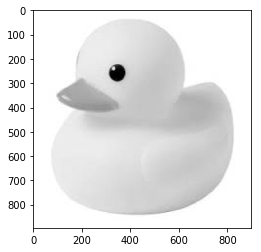

In [40]:
I_new = np.transpose(I_new)
plt.imshow(I_new,cmap='gray')
plt.show()